<a href="https://colab.research.google.com/github/Jwalitsolanki/Oil-and-Gas_ML/blob/master/ANN_Bank_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [6]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "BankNote_Authentication.csv" with length 46442 bytes


In [7]:
uploaded

{'BankNote_Authentication.csv': b'variance,skewness,curtosis,entropy,class\r\n3.6216,8.6661,-2.8073,-0.44699,0\r\n4.5459,8.1674,-2.4586,-1.4621,0\r\n3.866,-2.6383,1.9242,0.10645,0\r\n3.4566,9.5228,-4.0112,-3.5944,0\r\n0.32924,-4.4552,4.5718,-0.9888,0\r\n4.3684,9.6718,-3.9606,-3.1625,0\r\n3.5912,3.0129,0.72888,0.56421,0\r\n2.0922,-6.81,8.4636,-0.60216,0\r\n3.2032,5.7588,-0.75345,-0.61251,0\r\n1.5356,9.1772,-2.2718,-0.73535,0\r\n1.2247,8.7779,-2.2135,-0.80647,0\r\n3.9899,-2.7066,2.3946,0.86291,0\r\n1.8993,7.6625,0.15394,-3.1108,0\r\n-1.5768,10.843,2.5462,-2.9362,0\r\n3.404,8.7261,-2.9915,-0.57242,0\r\n4.6765,-3.3895,3.4896,1.4771,0\r\n2.6719,3.0646,0.37158,0.58619,0\r\n0.80355,2.8473,4.3439,0.6017,0\r\n1.4479,-4.8794,8.3428,-2.1086,0\r\n5.2423,11.0272,-4.353,-4.1013,0\r\n5.7867,7.8902,-2.6196,-0.48708,0\r\n0.3292,-4.4552,4.5718,-0.9888,0\r\n3.9362,10.1622,-3.8235,-4.0172,0\r\n0.93584,8.8855,-1.6831,-1.6599,0\r\n4.4338,9.887,-4.6795,-3.7483,0\r\n0.7057,-5.4981,8.3368,-2.8715,0\r\n1.1432,-

In [8]:
import io
df = pd.read_csv(io.StringIO(uploaded['BankNote_Authentication.csv'].decode('utf-8')))

In [9]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [13]:
df.shape

(1372, 5)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [19]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

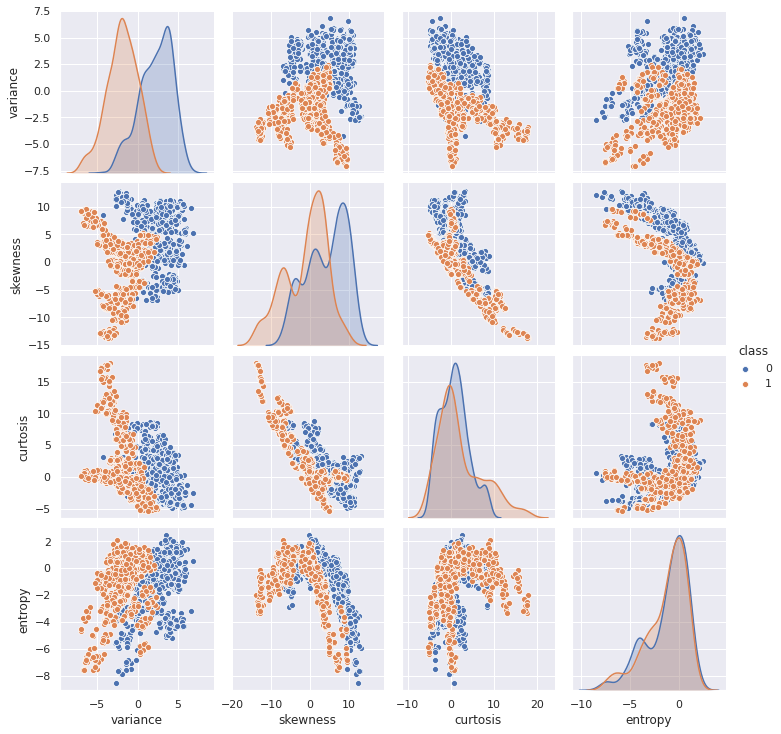

In [22]:
sns.pairplot(df, hue='class')
plt.show()

In [23]:
import tensorflow as tf

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

In [26]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df['class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
model = Sequential()

In [30]:
# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

In [31]:
# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [32]:
# Display a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
35/35 [==============================] - 0s 872us/step - loss: 0.1124 - accuracy: 0.9781
Epoch 2/30
35/35 [==============================] - 0s 893us/step - loss: 0.1101 - accuracy: 0.9772
Epoch 3/30
35/35 [==============================] - 0s 859us/step - loss: 0.1078 - accuracy: 0.9717
Epoch 4/30
35/35 [==============================] - 0s 839us/step - loss: 0.1057 - accuracy: 0.9736
Epoch 5/30
35/35 [==============================] - 0s 852us/step - loss: 0.1037 - accuracy: 0.9745
Epoch 6/30
35/35 [==============================] - 0s 843us/step - loss: 0.1019 - accuracy: 0.9745
Epoch 7/30
35/35 [==============================] - 0s 904us/step - loss: 0.1002 - accuracy: 0.9745
Epoch 8/30
35/35 [==============================] - 0s 889us/step - loss: 0.0985 - accuracy: 0.9745
Epoch 9/30
35/35 [==============================] - 0s 842us/step - loss: 0.0969 - accuracy: 0.9745
Epoch 10/30
35/35 [==============================] - 0s 964us/step - loss: 0.0954 - accuracy: 0.9763

In [38]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

9/9 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9673


In [39]:
# Print accuracy
print('Accuracy:',accuracy)

Accuracy: 0.9672726988792419


In [40]:
# Prediction
preds = model.predict(X_test)

for pred in enumerate(preds):
  print("{} | {}".format(pred,y_test))

(0, array([0.00443664], dtype=float32)) | 430     0
588     0
296     0
184     0
244     0
       ..
1341    1
1100    1
620     0
617     0
602     0
Name: class, Length: 275, dtype: int64
(1, array([0.14737758], dtype=float32)) | 430     0
588     0
296     0
184     0
244     0
       ..
1341    1
1100    1
620     0
617     0
602     0
Name: class, Length: 275, dtype: int64
(2, array([0.10726443], dtype=float32)) | 430     0
588     0
296     0
184     0
244     0
       ..
1341    1
1100    1
620     0
617     0
602     0
Name: class, Length: 275, dtype: int64
(3, array([0.00098002], dtype=float32)) | 430     0
588     0
296     0
184     0
244     0
       ..
1341    1
1100    1
620     0
617     0
602     0
Name: class, Length: 275, dtype: int64
(4, array([0.00134602], dtype=float32)) | 430     0
588     0
296     0
184     0
244     0
       ..
1341    1
1100    1
620     0
617     0
602     0
Name: class, Length: 275, dtype: int64
(5, array([0.00260246], dtype=float32)) | 430